In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# dataset info

In [3]:
bc.target[0]

0

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

# Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [7]:
print(f"Features    train: {X_train.shape} - test: {X_test.shape}")
print(f"Features    train: {y_train.shape} - test: {y_test.shape}")

Features    train: (455, 30) - test: (114, 30)
Features    train: (455,) - test: (114,)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Classification

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train = {acc_train} - acc test = {acc_test} - precision = {p} - recall = {r}")

    return acc_train, acc_test, p, r

## 1. Naive bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9362637362637363 - acc test = 0.9298245614035088 - precision = 0.9354838709677419 - recall = 0.9354838709677419


## 2. KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [13]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9758241758241758 - acc test = 0.956140350877193 - precision = 0.9384615384615385 - recall = 0.9838709677419355


## 3. Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [15]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 1.0 - acc test = 0.9122807017543859 - precision = 0.9193548387096774 - recall = 0.9193548387096774


## 4. Random Forest

In [16]:
from sklearn.ensemble import  RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=4, n_estimators=1000)

In [17]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9978021978021978 - acc test = 0.9473684210526315 - precision = 0.9516129032258065 - recall = 0.9516129032258065


## 5. SVM

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [19]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.989010989010989 - acc test = 0.956140350877193 - precision = 0.9672131147540983 - recall = 0.9516129032258065


## 5. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.9758241758241758 - acc test = 0.956140350877193 - precision = 0.9384615384615385 - recall = 0.9838709677419355


## 6. ANN

In [22]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='tanh', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=256)

In [23]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train = 0.989010989010989 - acc test = 0.956140350877193 - precision = 0.9672131147540983 - recall = 0.9516129032258065


# Comparison

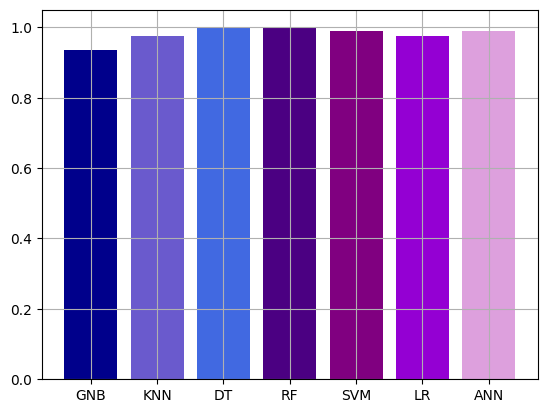

In [24]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['darkblue', 'slateblue', 'royalblue', 'indigo', 'purple', 'darkviolet', 'plum']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

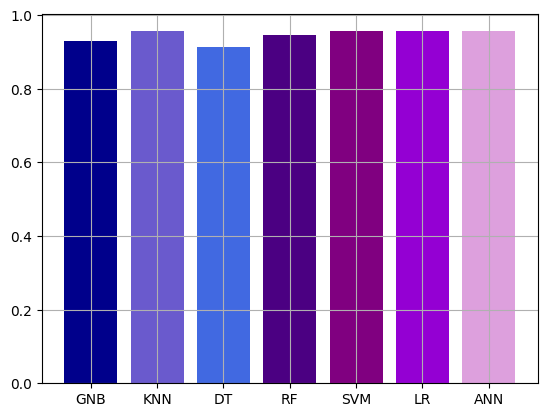

In [25]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['darkblue', 'slateblue', 'royalblue', 'indigo', 'purple', 'darkviolet', 'plum']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

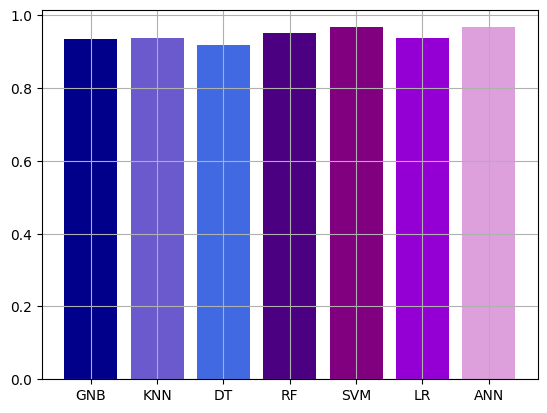

In [26]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['darkblue', 'slateblue', 'royalblue', 'indigo', 'purple', 'darkviolet', 'plum']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

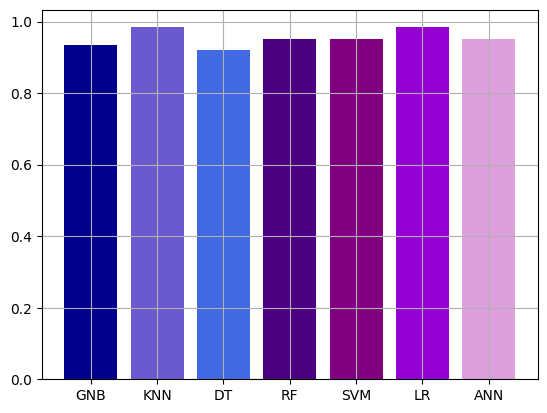

In [27]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['darkblue', 'slateblue', 'royalblue', 'indigo', 'purple', 'darkviolet', 'plum']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()